In [1]:
import pandas as pd
df = pd.read_csv("heart.csv")
print(df.head())
print(df.info())

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-

In [2]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [3]:
import seaborn as sns

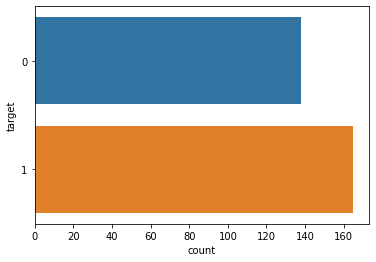

In [4]:
sns.countplot(y=df.iloc[:,13],data=df)

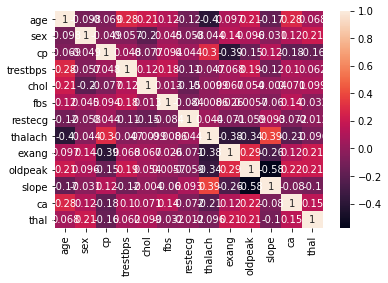

In [5]:
sns.heatmap(df.iloc[:,:13].corr(),annot = True)

In [6]:
X = df.iloc[:,:13]
Y = df.iloc[:,13]

In [7]:
print(X.head())
print(Y.head())

   age  sex  cp  trestbps  chol  fbs  ...  thalach  exang  oldpeak  slope  ca  thal
0   63    1   3       145   233    1  ...      150      0      2.3      0   0     1
1   37    1   2       130   250    0  ...      187      0      3.5      0   0     2
2   41    0   1       130   204    0  ...      172      0      1.4      2   0     2
3   56    1   1       120   236    0  ...      178      0      0.8      2   0     2
4   57    0   0       120   354    0  ...      163      1      0.6      2   0     2

[5 rows x 13 columns]
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


In [8]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
X_scaled = scaled.fit_transform(X)

In [9]:
print(X_scaled)

[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]


In [10]:
import numpy as np
X_scaled = np.insert(X_scaled,0,values=1,axis=1)
print(X_scaled)

[[ 1.          0.9521966   0.68100522 ... -2.27457861 -0.71442887
  -2.14887271]
 [ 1.         -1.91531289  0.68100522 ... -2.27457861 -0.71442887
  -0.51292188]
 [ 1.         -1.47415758 -1.46841752 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.          1.50364073  0.68100522 ... -0.64911323  1.24459328
   1.12302895]
 [ 1.          0.29046364  0.68100522 ... -0.64911323  0.26508221
   1.12302895]
 [ 1.          0.29046364 -1.46841752 ... -0.64911323  0.26508221
  -0.51292188]]


In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 42)

In [72]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(212, 13) (91, 13) (212,) (91,)


### GRADIENT DESCENT FOR LOGISTIC REGRESSION

In [73]:
alpha = 0.01
iter = 1000 #number of iterations
beta = np.zeros((13))
print(beta.shape)
m = X_train.shape[0]
print(m) #number of training examples

(13,)
212


In [74]:
def sigmoid(x):
  y = 1/(1+np.exp(-x))
  return y

In [103]:
beta = np.zeros((13))
error = []
for i in range(iter):
  ##print(i)
  z = X_train.dot(beta)
  ##print("Z=",z.shape)
  y_pred = sigmoid(z)
  ##print("Y_pred=",y_pred.shape)
  error.append(np.sum(abs(y_pred-Y_train)))
  cost_gradient = X_train.T.dot(y_pred-Y_train)
  ##print("Cost_Gradient=",cost_gradient.shape)
  beta = beta - ((alpha/m)*(cost_gradient))
  ##print("Beta=",beta.shape)
print(beta)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


age        -3.820219
sex        -0.772079
cp          1.660093
trestbps   -2.218605
chol       -0.127869
fbs         0.120160
restecg     0.129836
thalach     5.297475
exang      -0.895320
oldpeak    -1.886061
slope       0.741500
ca         -1.505731
thal       -1.208680
dtype: float64


In [104]:
y_test_pred = sigmoid(X_test.dot(beta))
Y_labels = []
for i in y_test_pred:
  if i>=0.5:
    Y_labels.append(1)
  else:
    Y_labels.append(0)

In [105]:
print(Y_test.shape)
print(len(Y_labels))

(91, 1)
91


In [106]:
TP = 0
TN = 0
FP = 0
FN = 0
Y_test = np.array(Y_test)
Y_test = Y_test.reshape(-1,1)
for i in range(len(Y_labels)):
  if Y_labels[i] == 1 and Y_test[i] == 1:
    TP = TP+1
  if Y_labels[i] == 0 and Y_test[i] == 0:
    TN = TN+1
  if Y_labels[i] == 1 and Y_test[i] == 0:
    FP = FP+1
  if Y_labels[i] == 0 and Y_test[i] == 1:
    FN = FN+1
print("TP = ", TP)
print("TN = ", TN)
print("FN = ", FN)
print("FP = ", FP)

TP =  47
TN =  5
FN =  3
FP =  36


In [107]:
accuracy = (TP+FP)/(len(Y_test))
print("Accuracy = ", accuracy)
precision_pos=TP/(TP+FP)
recall_pos=TP/(TP+FN)
f1_score_pos=2*precision_pos*recall_pos/(precision_pos+recall_pos)
print(precision_pos,recall_pos,f1_score_pos)

Accuracy =  0.9120879120879121
0.5662650602409639 0.94 0.7067669172932332


In [94]:
seq = [] 
for i in range(1000):
  seq.append(i)
print(seq)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [102]:
print(error)

[146.9472022787084, inf, inf, inf, 38336.19658207546, inf, 27579.226040566027, inf, 16822.25549905659, inf, 6065.2851817756, inf, inf, inf, inf, 36462.09387837583, inf, 25705.123336866403, inf, 14948.15279535697, inf, 4397.7058349179, inf, inf, inf, 35342.20113612924, inf, 24585.230594619803, inf, 13828.260055697005, inf, 3785.2160379608113, inf, 11349.034430332904, inf, inf, inf, 24988.30336165842, inf, 14233.259934320162, inf, inf, inf, 11604.624756707417, inf, inf, inf, 22062.841680061076, inf, 11400.029811859375, inf, inf, inf, 17946.690832931985, inf, 7885.218401433483, inf, inf, inf, 12453.1030689193, inf, inf, inf, 13492.251434163993, inf, inf, inf, 13452.042743970323, inf, inf, inf, 12805.845423425104, inf, inf, inf, 12714.014018885797, inf, inf, inf, 12090.217013561483, inf, inf, inf, 14163.67299378565, inf, inf, inf, 11598.35683148243, inf, inf, inf, 14369.508830428615, inf, inf, inf, inf, inf, inf, inf, 12742.613139874393, inf, inf, inf, 13912.822429744198, inf, inf, inf, in

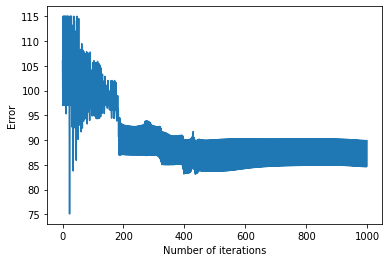

In [108]:
import matplotlib.pyplot as plt
plt.plot(seq,error)
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.show()


In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr=LogisticRegression(solver='sag')
#sag denote Stochastic Average Gradient
model=lr.fit(X_train,Y_train)
Y_label1=model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [85]:
print(metrics.classification_report(Y_test,Y_label1))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        41
           1       0.78      0.78      0.78        50

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91

